<a href="https://colab.research.google.com/github/Vishakhatu/Capstone/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN:
One type of neural network that is especially well-suited for processing sequential input is called a recurrent neural network, or RNN. RNNs are different from feedforward neural networks in that they feature connections that create directed cycles, which enable them to keep track of past inputs. This makes RNNs perfect for jobs like speech recognition, natural language processing, and time series prediction where the data's order matters.**

Install TensorFlow

In [7]:
!pip install tensorflow

Import necessary libraries

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

 Load and preprocess the IMDB dataset

In [9]:
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step



Build the RNN model
```
```



In [10]:
model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))


 Compile the model

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train the model

In [12]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 27s 82ms/step - loss: 0.5742 - accuracy: 0.6765 - val_loss: 0.4232 - val_accuracy: 0.8160
Epoch 2/5
313/313 [==============================] - 26s 85ms/step - loss: 0.3965 - accuracy: 0.8323 - val_loss: 0.4202 - val_accuracy: 0.8210
Epoch 3/5
313/313 [==============================] - 26s 84ms/step - loss: 0.2406 - accuracy: 0.9065 - val_loss: 0.4184 - val_accuracy: 0.8412
Epoch 4/5
313/313 [==============================] - 26s 84ms/step - loss: 0.2264 - accuracy: 0.9071 - val_loss: 0.4664 - val_accuracy: 0.8244
Epoch 5/5
313/313 [==============================] - 25s 80ms/step - loss: 0.1301 - accuracy: 0.9532 - val_loss: 0.5050 - val_accuracy: 0.8202


Evaluate the model

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

782/782 [==============================] - 12s 15ms/step - loss: 0.5404 - accuracy: 0.8125

Test accuracy: 0.8125200271606445


Plot the training and validation accuracy and loss

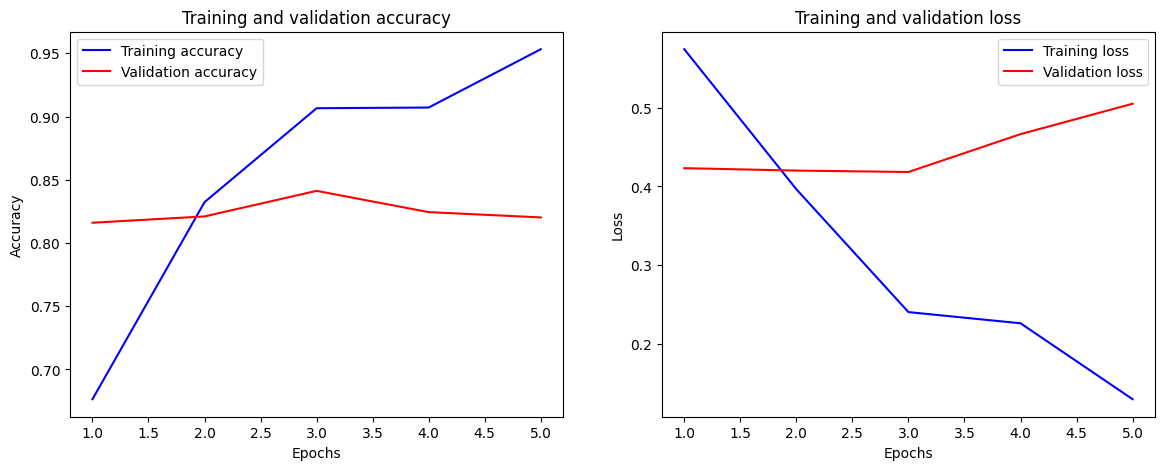

In [14]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)
